# Data Preparation and Advanced Model Evaluation

## Agenda

**Data preparation**

- Handling missing values
- Handling categorical features (review)

**Advanced model evaluation**

- ROC curves and AUC
- Bonus: ROC curve is only sensitive to rank order of predicted probabilities
- Cross-validation

## Part 1: Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

In [1]:
# read the Titanic data
import pandas as pd
url = '../../data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.shape

(891, 11)

In [2]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

One possible strategy is to **drop missing values**:

In [7]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [8]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

In [9]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Sometimes a better strategy is to **impute missing values**:

In [10]:
# mean Age
titanic.Age.mean()

29.69911764705882

In [11]:
# median Age
titanic.Age.median()

28.0

In [12]:
# most frequent Age
titanic.Age.mode()

0    24.0
dtype: float64

In [28]:
# create a dataframe with no missing values for ages
titanic_with_ages = titanic[titanic.Age.notnull()]
y = titanic_with_ages['Age']
X = titanic_with_ages.drop(['Age','Survived'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Create a model to predict the age


- Use visualizations to determine which features may be useful for the prediction
- Create new features (e.g. extract the title from the name)
- Develop a regression model (e.g KNeighborRegressor)
- Evaluate the output
- Repeat
- Make a final prediction

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


In [8]:
titanic_with_ages.head(5)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic_with_ages['Sex_Female'] = titanic_with_ages.Sex.map({'male':0, 'female':1})

/Users/anna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


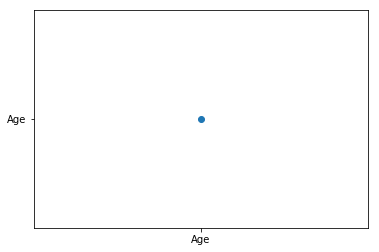

In [23]:

plt.scatter(x='Age',y='Age')

In [21]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred_class)

NameError: name 'y_pred_class' is not defined

In [6]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_class).ravel()
print('TN:{} | FP:{} | FN:{} | TP:{}'.format(tn, fp, fn, tp))

NameError: name 'metrics' is not defined

In [17]:
from sklearn import metrics
metrics.mean_squared_error

In [20]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

NameError: name 'y_pred_prob' is not defined

<function sklearn.metrics.regression.mean_absolute_error>

<function mean_absolute_error at 0x10ef079d8>
